In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [19]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (243, 15)


In [11]:
# Check for null values
df.isnull().sum()



day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
#Checking outliers
# Calculate the interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Display rows with potential outliers
print("Rows with potential outliers:")
print(df[outliers])


Rows with potential outliers:
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
14    15      6  2012           28  80  17   3.1  49.4   3.0   7.4  0.4   3.0   
15    16      6  2012           29  89  13   0.7  36.1   1.7   7.6  0.0   2.2   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
218    6      9  2012           34  71  14   6.5  64.5   3.3   9.1  1.0   3.5   
231   19      9  2012           29  41   8   0.1  83.9  24.9  86.0  2.7  28.9   
236   24      9  2012           26  49   6   2.0  61.3  11.9  28.1  0.6  11.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  

<ipython-input-20-9829641bf33d>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-20-9829641bf33d>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-20-9829641bf33d>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [23]:
# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
cleaned_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Display the shape of the cleaned dataset
print(cleaned_df.shape)

(177, 15)


<ipython-input-23-b31afd33b51e>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cleaned_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [25]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [27]:
cleaned_df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,15.435028,7.435028,2012.0,32.519774,61.666667,15.338983,0.150847,81.292090,13.550847,46.435593,4.901130,15.549718,6.820339,0.468927
std,8.431375,1.116770,0.0,3.237020,13.810679,2.339946,0.276775,9.889988,8.508452,34.818819,3.495435,9.956491,5.905981,0.500449
min,1.000000,6.000000,2012.0,24.000000,21.000000,10.000000,0.000000,47.400000,1.900000,7.300000,0.200000,2.400000,0.100000,0.000000
25%,8.000000,6.000000,2012.0,30.000000,53.000000,14.000000,0.000000,78.100000,6.700000,18.700000,2.000000,7.100000,1.200000,0.000000
50%,15.000000,7.000000,2012.0,33.000000,63.000000,15.000000,0.000000,84.600000,12.000000,36.800000,4.300000,13.700000,5.900000,0.000000
75%,22.000000,8.000000,2012.0,35.000000,72.000000,17.000000,0.200000,88.200000,18.700000,62.100000,7.100000,21.700000,10.700000,1.000000
max,31.000000,9.000000,2012.0,40.000000,90.000000,21.000000,1.200000,94.300000,41.100000,151.300000,16.000000,45.500000,26.300000,1.000000


In [ ]:
#Now our data is cleaned and we have removed the outliers

In [38]:
# Split the dataset into features (X) and target variable (y)
X = cleaned_df[['Temperature','RH','Ws']]
y = cleaned_df['FWI']

In [39]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# scaling
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

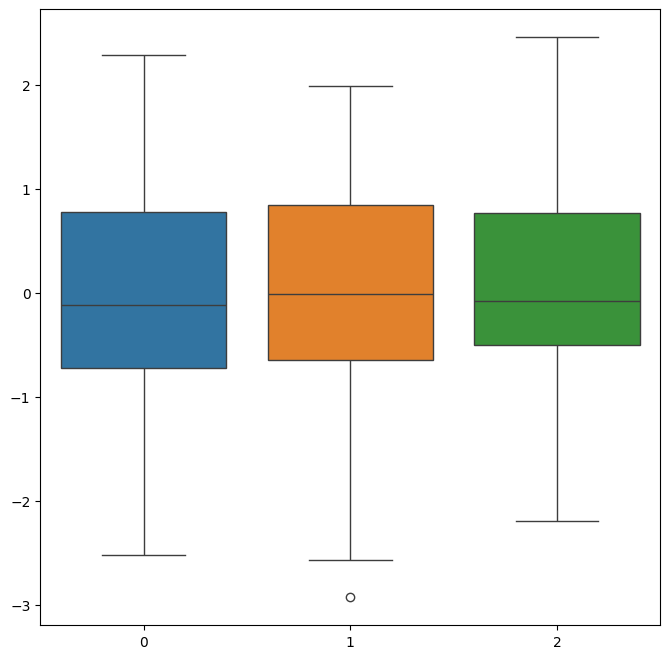

In [44]:
# Checking outliers in training set for hyperparameters by box plot
plt.figure(figsize=(8,8))
sns.boxplot(data=X_train_scaled)



In [45]:
#using linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)


LinearRegression()

In [46]:
# Evaluating coefficient and intercept
lr.coef_, lr.intercept_

(array([ 2.49920587, -1.86021637,  1.45428071]), 6.732624113475179)

In [48]:
y_pred = lr.predict(X_test_scaled)

In [49]:
# Calculating mean squared error (MSE), mean absolute error (MAE), or coefficient of determination (R-squared)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('r2:', r2)
print('mae:', mae)
print('mse:', mse)

r2: 0.4961491239498945
mae: 3.5126971785904093
mse: 17.03048229276758


In [51]:
# Pickling
# Use of pickle files - Pickling allows you to save your trained model to disk so that it can be reused later without needing to retrain it every time you want to use it.

import pickle
pickle.dump(lr, open('lr.pkl','wb'))
pickle.dump(scaler, open('scaler_lambton.pkl','wb'))


In [ ]:
# Lets now create a new data frame with unknown data and run the model from pickle file to predict dependent variable for unseen data

In [52]:
unknown_data = {
     'Temperature' : ['38.5','42','40.5'],
     'RH' : [57,65,71],
     'Ws' : [14,16.5,18]
}

In [53]:
new_df = pd.DataFrame(unknown_data)

In [54]:
new_df

,Temperature,RH,Ws
0,38.5,57,14.0
1,42,65,16.5
2,40.5,71,18.0


In [55]:
import pickle
scale_new_data = pickle.load(open('scaler_lambton.pkl', 'rb'))

In [65]:
#importing model from pickle file
lr_modelfrompickle = pickle.load(open('lr.pkl', 'rb'))

In [57]:
new_df_sc = scale_new_data.transform(new_df)

In [58]:
new_df_sc

array([[ 1.83607832, -0.36204686, -0.50125972],
       [ 2.88907617,  0.20832864,  0.55678849],
       [ 2.43779138,  0.63611026,  1.19161742]])

In [62]:
y_pred_new_data = lr_modelfrompickle.predict(new_df_sc)

In [64]:
#Predicted values for unseen data
y_pred_new_data

array([11.26587498, 14.37521066, 13.37481014])